# Programming for Data Analytics - Assignment 6 - weather

************************
*Task 05 of the assessment - Knock airport Weather* 
************************

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv


*Plot:*

- The temperature
- The mean temperature each day
- The mean temperature for each month


*For additional marks:*
- The Windspeed (there is data missing from this column)
- The rolling windspeed (say over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds

************

Import nessesary libaries:

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

After inspecting this data, I need to ignore first few rows, to get into my dataset. 

In [46]:
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23, low_memory=False)
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


As the `date` column contains date and time, I will convert this column into `datetime` object. For plotting I need only date, so it will be easier to manipluate with this data. 

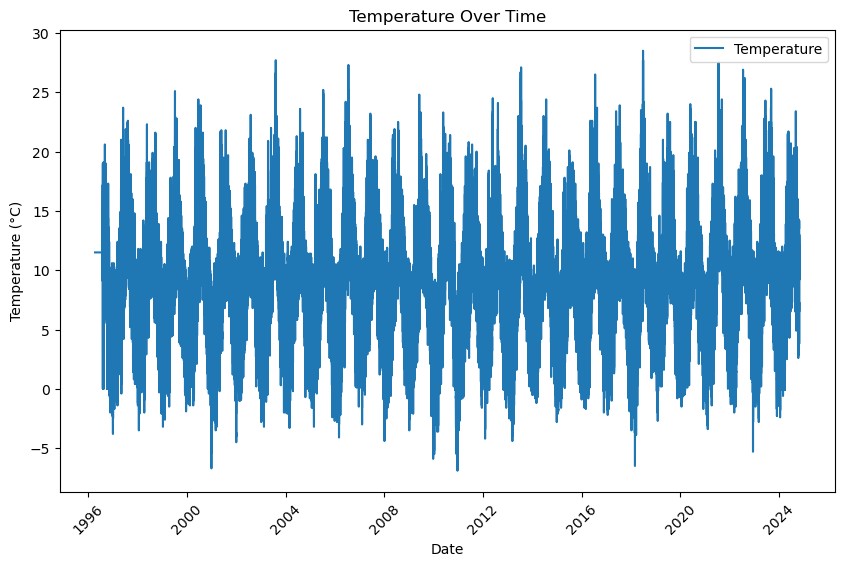

In [47]:
# Converting data to date-time object 
df['datetime'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M') # Day of the month as a zero-padded decimal number [01, 02, ..., 30, 31]
                                                                     # Month as locale's abbreviated name
                                                                     # Year with century as a decimal number
                                                                     # Hour (24-hour clock) as a zero-padded decimal number [00, 01, ..., 22, 23]
                                                                     # Minute as a zero-padded decimal number [00, 01, ..., 58, 59]

# Splitting the 'datetime' into 'date' and 'time'
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time

# Creating a plot for temperature over time 
plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['temp'], label='Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()






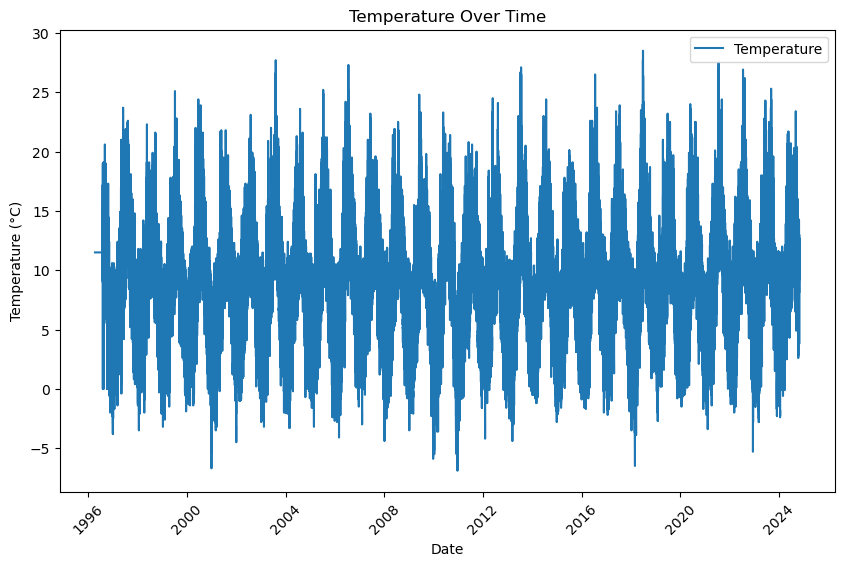

In [48]:
# Converting data to date-time object 
df['datetime'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M') # %d Day of the month as a zero-padded decimal number [01, 02, ..., 30, 31]
                                                                     # %b Month as locale's abbreviated name
                                                                     # %Y Year with century as a decimal number
                                                                     # %H Hour (24-hour clock) as a zero-padded decimal number [00, 01, ..., 22, 23]
                                                                     # %M Minute as a zero-padded decimal number [00, 01, ..., 58, 59]

# Splitting the 'datetime' into 'date' and 'time'
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time

# Creating a plot for temperature over time 
plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['temp'], label='Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()



Now, to plot mean temperature per day over the time in my dataset. I am using `groupby()` to group data based on specific column values and calculate mean for each day. 

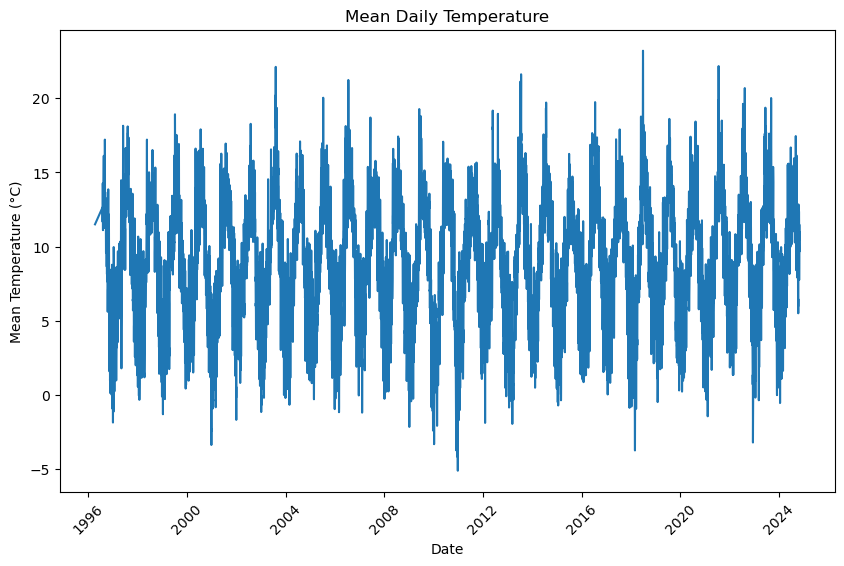

In [49]:
# Calculate daily mean temperature
mean_day = df.groupby('date')['temp'].mean()

# Plot daily mean temperature
plt.figure(figsize=(10, 6))
mean_day.plot()
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Daily Temperature')
plt.xticks(rotation=45)
plt.show()

The simiar excercise will plot mean temperature per month over the time in my dataset.  I will use `df['month'] = df['datetime'].dt.to_period('M')` which can convert the datetime column into a period representing only the month and year. 


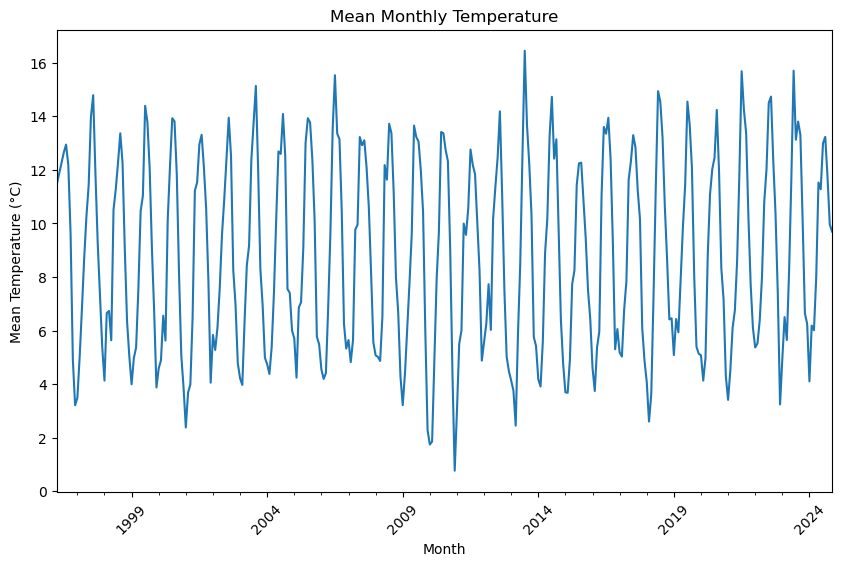

In [50]:
# Calculate monthly mean temperature
df['month'] = df['datetime'].dt.to_period('M')  # to_period('M') converts the datetime to a monthly period
mean_month = df.groupby('month')['temp'].mean()

# Plot monthly mean temperature
plt.figure(figsize=(10, 6))
mean_month.plot()
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Monthly Temperature')
plt.xticks(rotation=45)
plt.show()

**Additional plots**


In [51]:
# lets see the data again

df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23, low_memory=False)
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


In [52]:
# extracting the month from the 'datetime' column
df['datetime'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')

# Selecting 'month' and 'wdsp' columns 
df['month'] = df['datetime'].dt.month
cleandf = df[['month', 'wdsp']].copy()  # Make a copy to avoid warnings

# Replace spaces with nan and drop rows with nan in 'wdsp'
cleandf['wdsp'] = cleandf['wdsp'].replace(' ', np.nan)
cleandf.dropna(subset=['wdsp'], inplace=True)

# Convert 'wdsp' to float
cleandf['wdsp'] = cleandf['wdsp'].astype(float)

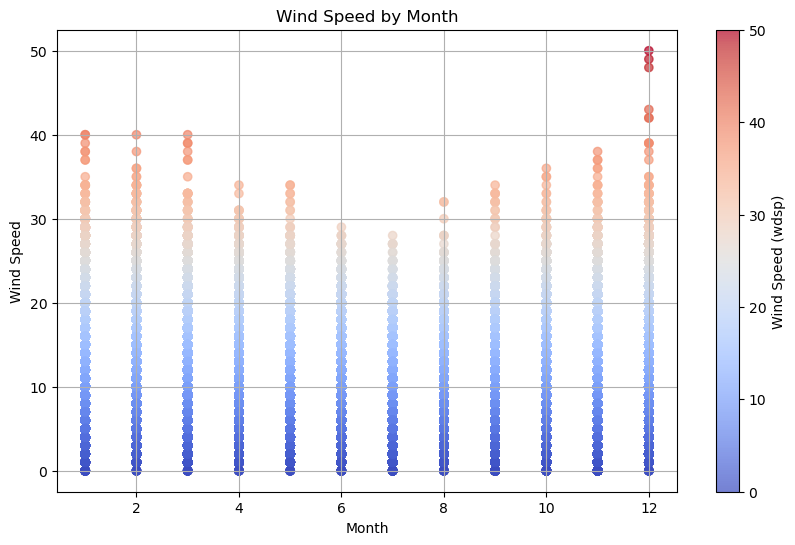

In [55]:
# lets plot it

plt.figure(figsize=(10, 6))
plt.scatter(cleandf['month'], cleandf['wdsp'], c=cleandf['wdsp'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Wind Speed (wdsp)')
plt.title('Wind Speed by Month')
plt.xlabel('Month')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.show()

******
End